<a href="https://colab.research.google.com/github/JayThadeshwar/Machine-Learning-Projects/blob/main/HousePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.pandas.set_option('display.max_columns',None)
ds = pd.read_csv('housedata.csv')

all_features = ds.columns
print(all_features)

# Finding the datatypes of the features


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Finding categorical features having null values

In [ ]:
features_nan = [feature for feature in all_features if ds[feature].isnull().sum()>1 and ds[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(ds[feature].isnull().mean(),4)))


Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


Finding numerical features having null values

In [ ]:
# All numerical features
numerical_feat = [feature for feature in all_features if ds[feature].dtypes!='O'] 

# Numerical features with null values
numerical_nan = [feature for feature in numerical_feat if ds[feature].isnull().sum()>1]

for feature in numerical_nan:
    print("{}: {}% missing values".format(feature,np.round(ds[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


Finding temporal features having null values


In [ ]:
# All the temporal features
temporal_feat = [feat for feat in all_features if "Year" in feat or "Yr" in feat]
print("Temporal features:",temporal_feat)

# Temporal features having null values
temporal_nan = [feat for feat in temporal_feat if ds[feat].isnull().sum() > 1]
print(temporal_nan)

Temporal features: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
['GarageYrBlt']


Understanding group by function

In [ ]:
test = ds.groupby('RoofStyle')
print(test.groups)

test = test['SalePrice']
# for x in test:
#   print(x)

{'Flat': [120, 153, 271, 457, 466, 588, 666, 828, 888, 934, 954, 1000, 1423], 'Gable': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 35, 36, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 82, 83, 84, 86, 87, 89, 90, 92, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 107, 108, 110, 111, 112, 115, 116, 117, 119, 121, 123, 124, 125, 126, 127, 128, ...], 'Gambrel': [30, 74, 114, 386, 508, 519, 574, 671, 1192, 1263, 1414], 'Hip': [10, 11, 12, 14, 19, 22, 33, 34, 37, 43, 45, 58, 78, 81, 85, 88, 91, 93, 97, 105, 109, 113, 118, 122, 135, 151, 156, 166, 169, 171, 178, 182, 190, 194, 196, 199, 209, 224, 230, 238, 247, 251, 253, 269, 273, 279, 294, 297, 300, 313, 327, 336, 339, 343, 346, 349, 350, 358, 365, 378, 387, 396, 403, 411, 416, 417, 422, 427, 440, 445, 450, 452, 455, 458, 463, 465, 475, 477, 478, 479, 480, 481, 483, 486, 496, 498, 502, 50

Learning charts

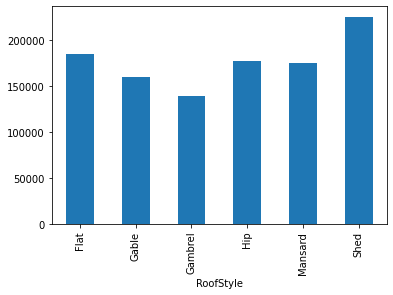

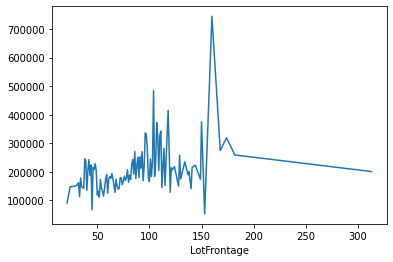

In [ ]:
ds.groupby('RoofStyle')['SalePrice'].median().plot(kind = 'bar')
plt.show()

ds.groupby('LotFrontage')['SalePrice'].median().plot()
plt.show()

**Creating charts to analyze the features**


1.   Categorical features



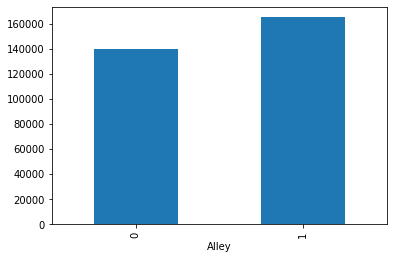

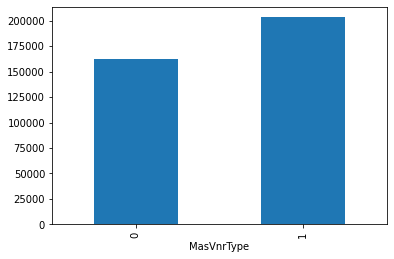

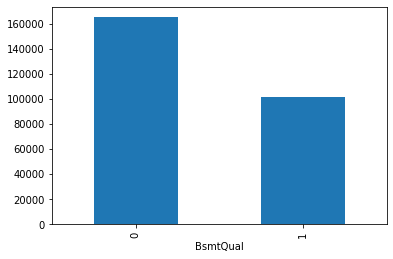

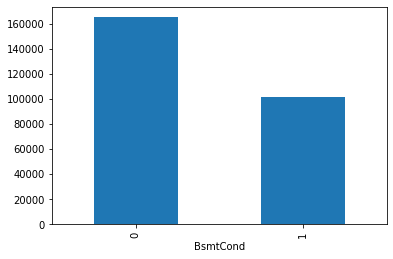

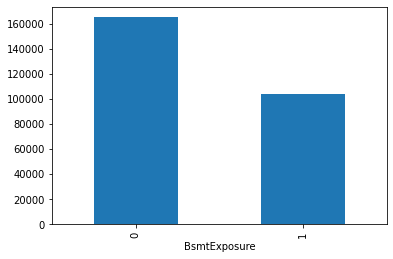

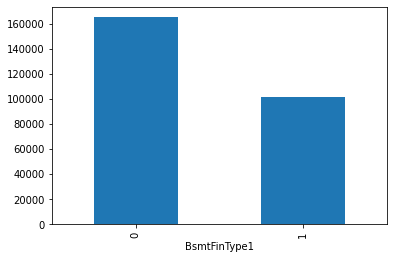

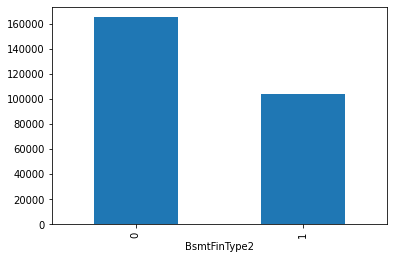

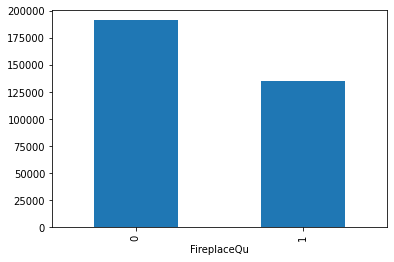

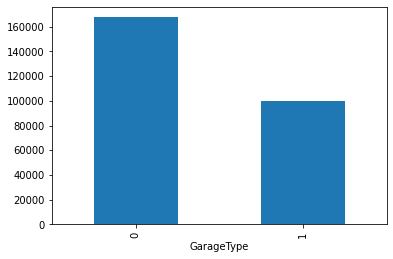

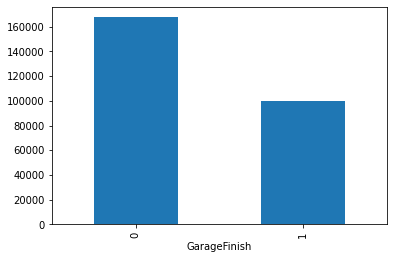

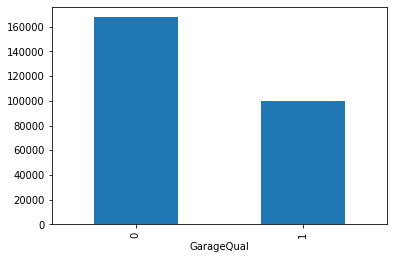

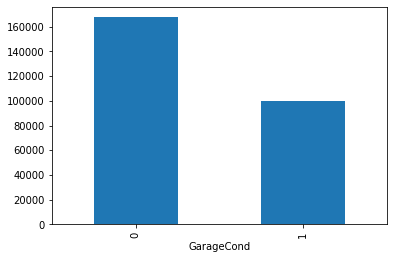

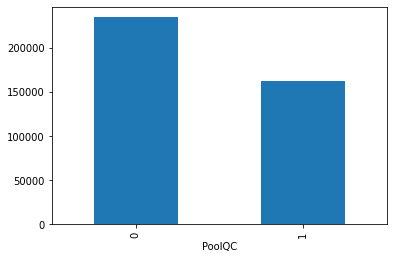

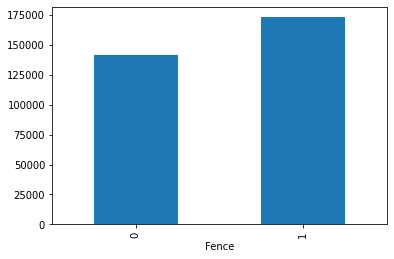

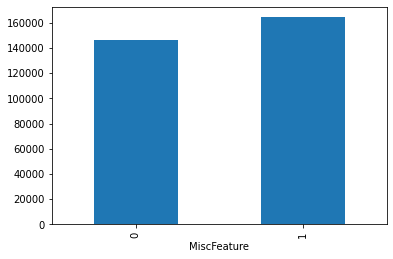

In [ ]:
for feat in features_nan:
  data = ds.copy()
  data[feat] = np.where(data[feat].isnull(),1,0)
  
  data.groupby(feat)['SalePrice'].median().plot.bar()
  plt.show()


From charts we can conclude that Nan values are affecting the SalePrice in some way. So we can't remove the Nan rows.

2.   Numerical features



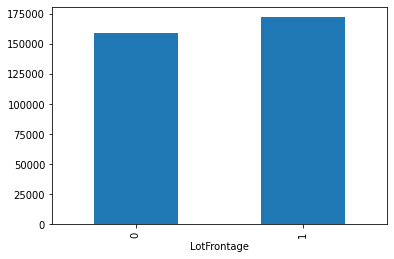

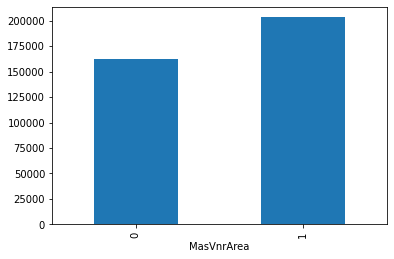

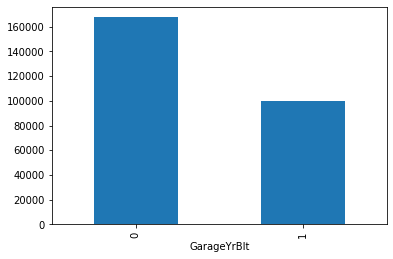

In [ ]:
for feat in numerical_nan:  
  data = ds.copy()
  data[feat] = np.where(data[feat].isnull(),1,0)
  
  data.groupby(feat)['SalePrice'].median().plot.bar()
  plt.show()



3.   Temporal features





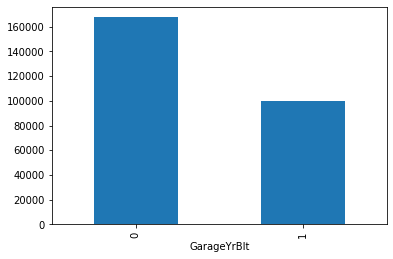

In [ ]:
for feat in temporal_nan:  
  data = ds.copy()
  data[feat] = np.where(data[feat].isnull(),1,0)
  
  data.groupby(feat)['SalePrice'].median().plot.bar()
  plt.show()

Exploring temporal data with the help of charts

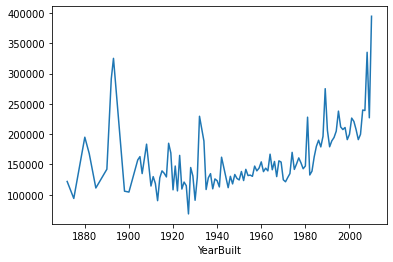

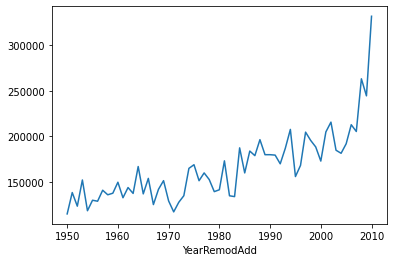

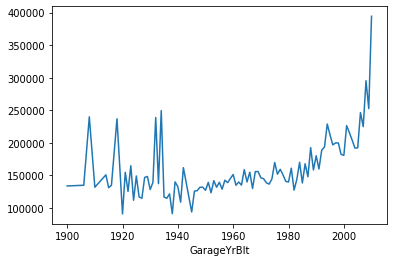

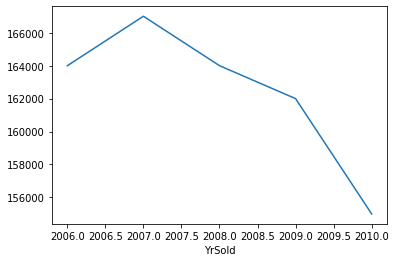

In [ ]:
for feat in temporal_feat:  
  data = ds.copy()
  data.groupby(feat)['SalePrice'].median().plot()
  plt.show()


In [ ]:
for feat in temporal_feat:  
  print(feat,sorted(ds[feat].unique()))

YearBuilt [1872, 1875, 1880, 1882, 1885, 1890, 1892, 1893, 1898, 1900, 1904, 1905, 1906, 1908, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
YearRemodAdd [1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 200

**Cleaning the data. Removing null values and replacing with meaningful data.**


1.   Categorical features



In [ ]:
def clean_cat(dataset,features_nan):
    data=ds.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

ds=clean_cat(ds,features_nan)

# ds[features_nan].isnull().sum()

2.   Numerical features



In [ ]:
for feature in numerical_nan:    
    median_val = ds[feature].median()
        
    ds[feature+'nan']= np.where(ds[feature].isnull(),1,0)
    ds[feature].fillna(median_val,inplace=True)
    
ds[numerical_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

3.   Temporal features



In [ ]:
# Calculating number of years from YrSold
for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:       
    ds[feature] = ds['YrSold'] - ds[feature]

ds.head()    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


Now, data is clean. We can analyze and select the features

In [ ]:
feat_corr = ds.corr()['SalePrice'].sort_values(ascending = False)
top_8 = (feat_corr.keys())[1:14]
print(top_8)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF'],
      dtype='object')


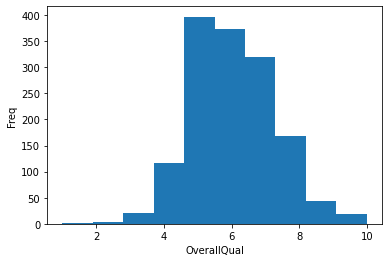

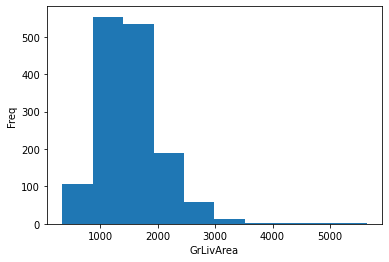

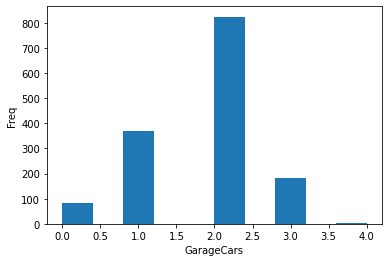

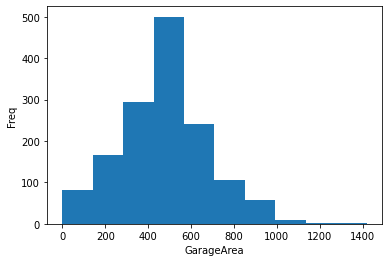

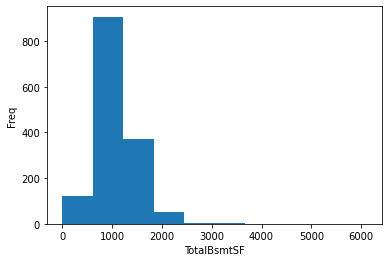

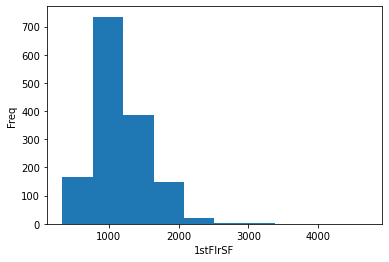

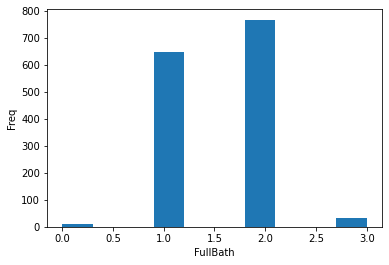

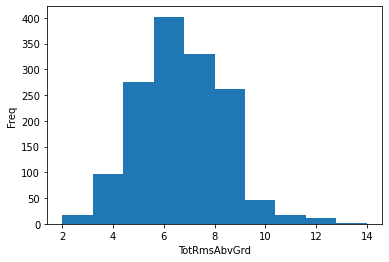

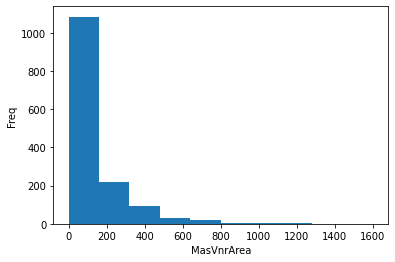

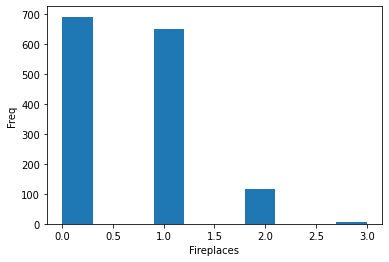

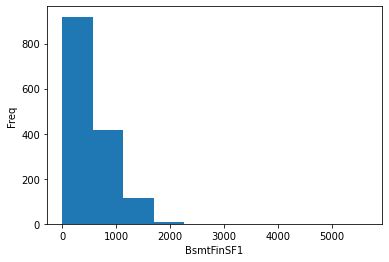

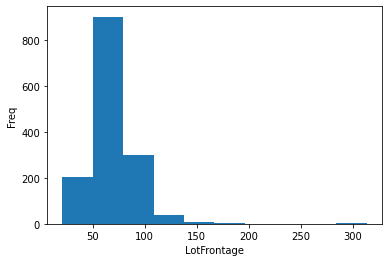

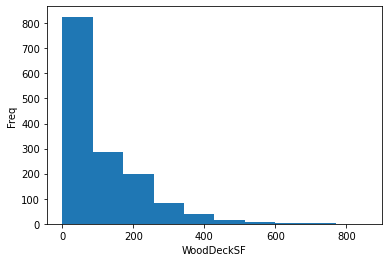

In [ ]:
for feat in top_8:  
  plt.hist(ds[feat])
  plt.xlabel(feat)
  plt.ylabel('Freq')
  plt.show() 


From the charts we can see that most of the features some what follow bell curve

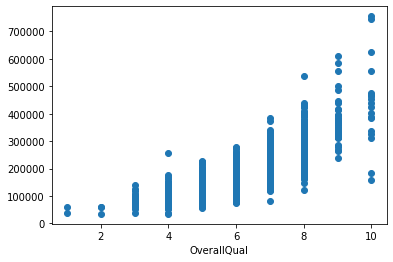

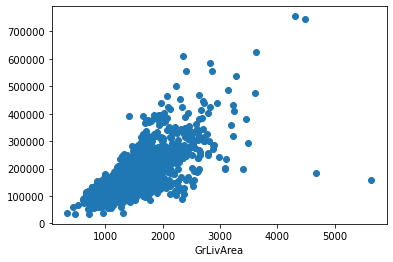

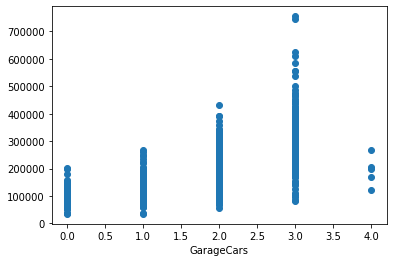

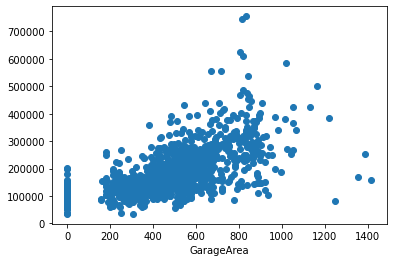

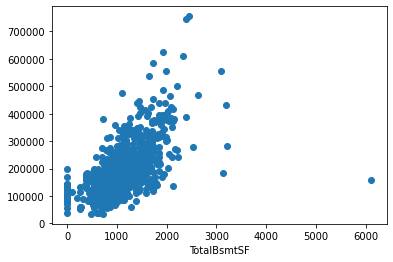

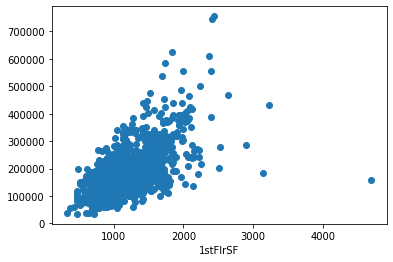

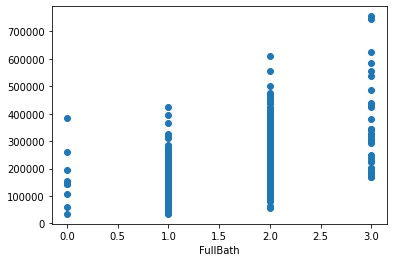

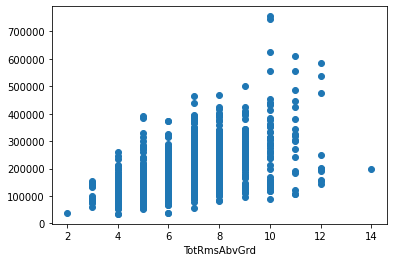

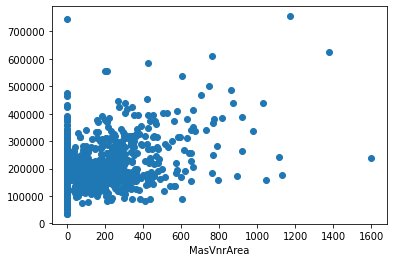

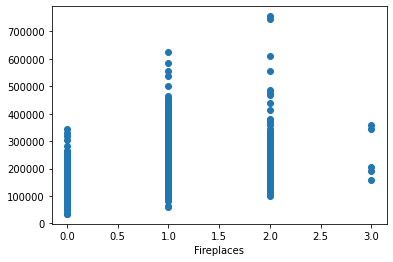

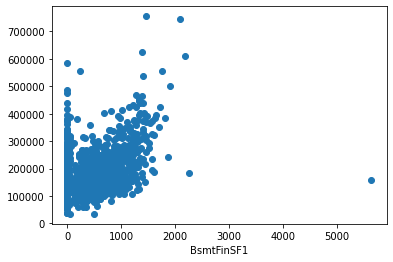

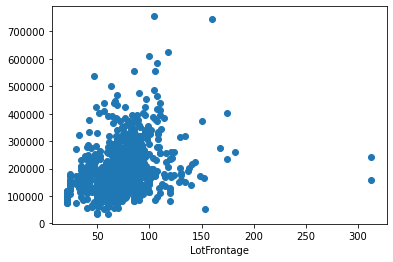

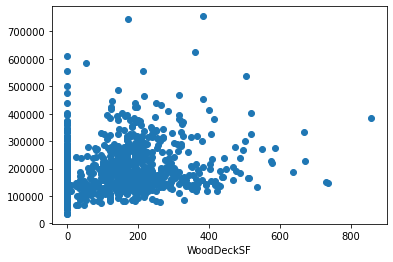

In [ ]:
for feat in top_8:  
  plt.scatter(ds[feat],ds['SalePrice'])
  plt.xlabel(feat)
  plt.show() 
  

From the above charts we can see that there are 
some outliers, but in very small number

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.preprocessing as preprocessing

X = ds[top_8]
y = ds['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)


# train
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_train = pd.DataFrame(X_scaled, columns=[X_train.columns])

# test
scaler = preprocessing.StandardScaler().fit(X_test)
X_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_scaled, columns=[X_test.columns])

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_predicted = linreg.predict(X_train)
y_test_predicted = linreg.predict(X_test)


for i in range(0,50):
  print("Actual value:",y_test.values[i],"\tPredicted value:",y_test_predicted[i])
  
linreg_train_r2 = linreg.score(X_train, y_train)
linreg_test_r2 = linreg.score(X_test, y_test)
print("Training R^2")
print(linreg_train_r2)
print("Test R^2")
print(linreg_test_r2)

linreg_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_predicted))
linreg_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_predicted))
print("Training RMSE, Test RMSE")
print(linreg_train_rmse, linreg_test_rmse)


Actual value: 212000 	Predicted value: 225799.8645880076
Actual value: 193000 	Predicted value: 189831.08339854932
Actual value: 274970 	Predicted value: 217879.8138316706
Actual value: 107000 	Predicted value: 86729.94645594546
Actual value: 135000 	Predicted value: 139114.84546437985
Actual value: 185500 	Predicted value: 202458.9313518297
Actual value: 194700 	Predicted value: 188543.62543681625
Actual value: 141000 	Predicted value: 142365.2914970111
Actual value: 277500 	Predicted value: 294918.12796807324
Actual value: 223000 	Predicted value: 232278.7032540214
Actual value: 149000 	Predicted value: 133253.76757304807
Actual value: 159500 	Predicted value: 171463.39772531565
Actual value: 260000 	Predicted value: 259725.04674436263
Actual value: 91000 	Predicted value: 117292.72036990957
Actual value: 145000 	Predicted value: 174632.8984004541
Actual value: 212000 	Predicted value: 220273.01834367483
Actual value: 148000 	Predicted value: 118820.42296296428
Actual value: 167000 	